## Preparing DATASET

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("housing.csv").iloc[:, :17]

In [26]:
data = data[data["flat_type"]!="EXECUTIVE"][data["flat_type"]!="MULTI GENERATION"]
data["total_rooms"] = data["flat_type"].str[0].astype(int)
data["total_bedrooms"] = data["total_rooms"]-1
data["month"] = data["month"].str[-2:].astype(int)
data.info()

C:\Users\Naren\AppData\Local\Temp\ipykernel_32160\2430305164.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[data["flat_type"]!="EXECUTIVE"][data["flat_type"]!="MULTI GENERATION"]


<class 'pandas.core.frame.DataFrame'>
Index: 776569 entries, 0 to 840917
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   month           776569 non-null  int32  
 1   year            776569 non-null  int64  
 2   town            776569 non-null  object 
 3   town_dummy      776569 non-null  int64  
 4   flat_type       776569 non-null  object 
 5   block           776569 non-null  object 
 6   street_name     776569 non-null  object 
 7   address         776569 non-null  object 
 8   latitude        776569 non-null  float64
 9   longitude       776569 non-null  float64
 10  storey_range    776569 non-null  object 
 11  storey          776569 non-null  int64  
 12  area_sqm        776569 non-null  float64
 13  flat_model      776569 non-null  object 
 14  lease_start     776569 non-null  int64  
 15  lease_rem       776569 non-null  int64  
 16  resale_price    776569 non-null  float64
 17  total_rooms    

In [27]:
data = data[["longitude","latitude", "month", "year", "total_rooms","total_bedrooms","town_dummy","storey","area_sqm","resale_price","flat_model"]]

In [28]:
data.to_csv("dataset_used.csv", index=False)

## Using the new, simplified dataset

In [29]:
from sklearn.model_selection import train_test_split

data = pd.read_csv("dataset_used.csv")


X = data.drop(['resale_price'], axis=1)
y = data['resale_price']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
train_data = X_train.join(y_train)

In [32]:
train_data

,longitude,latitude,month,year,total_rooms,total_bedrooms,town_dummy,storey,area_sqm,flat_model,resale_price
100144,103.713592,1.346584,11,1995,3,2,5,5,65.0,Improved,96000.0
607165,103.844400,1.428523,2,2012,3,2,5,2,74.0,Model A,305000.0
727582,103.816678,1.456484,12,2018,5,4,5,11,111.0,Improved,395000.0
198059,103.777096,1.438416,9,1998,5,4,5,8,121.0,Improved,280000.0
22745,103.720188,1.352399,11,1991,4,3,5,5,103.0,Model A,103000.0
...,...,...,...,...,...,...,...,...,...,...,...
112086,103.774428,1.443766,3,1996,3,2,5,11,68.0,New Generation,115000.0
611994,103.769002,1.312756,5,2012,3,2,2,13,67.0,New Generation,430000.0
266050,103.864401,1.319956,1,2000,3,2,3,8,68.0,Improved,150000.0
340662,103.854617,1.361328,4,2002,3,2,2,5,67.0,New Generation,130000.0


## Finding out correlations

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>],
       [<Axes: title={'center': 'town_dummy'}>,
        <Axes: title={'center': 'storey'}>,
        <Axes: title={'center': 'area_sqm'}>],
       [<Axes: title={'center': 'resale_price'}>, <Axes: >, <Axes: >]],
      dtype=object)

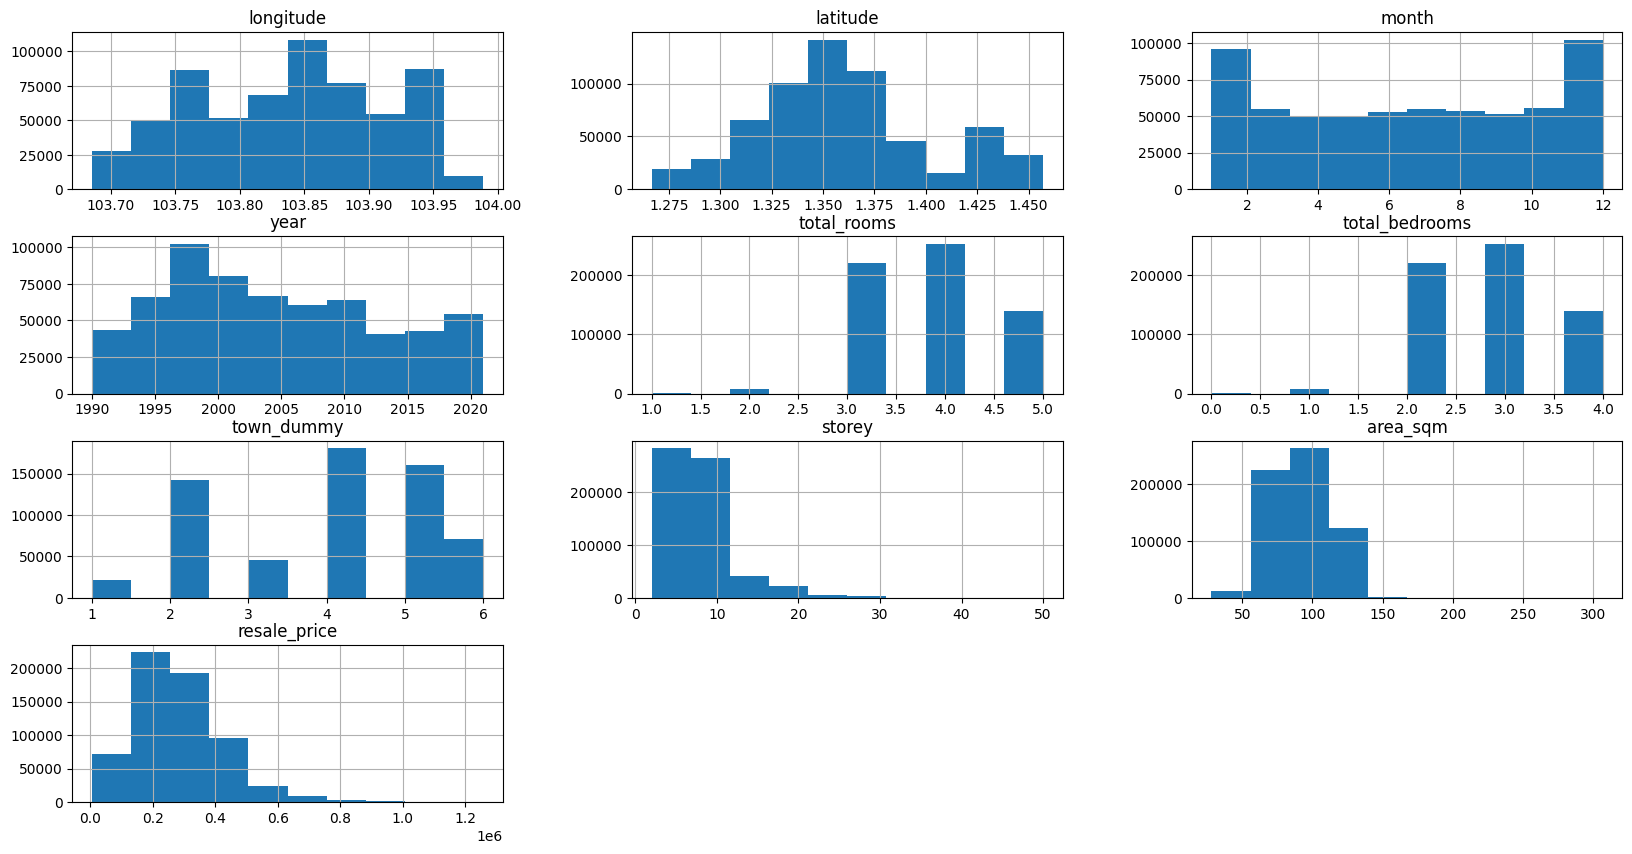

In [33]:
train_data.hist(figsize=(20,10))

<Axes: >

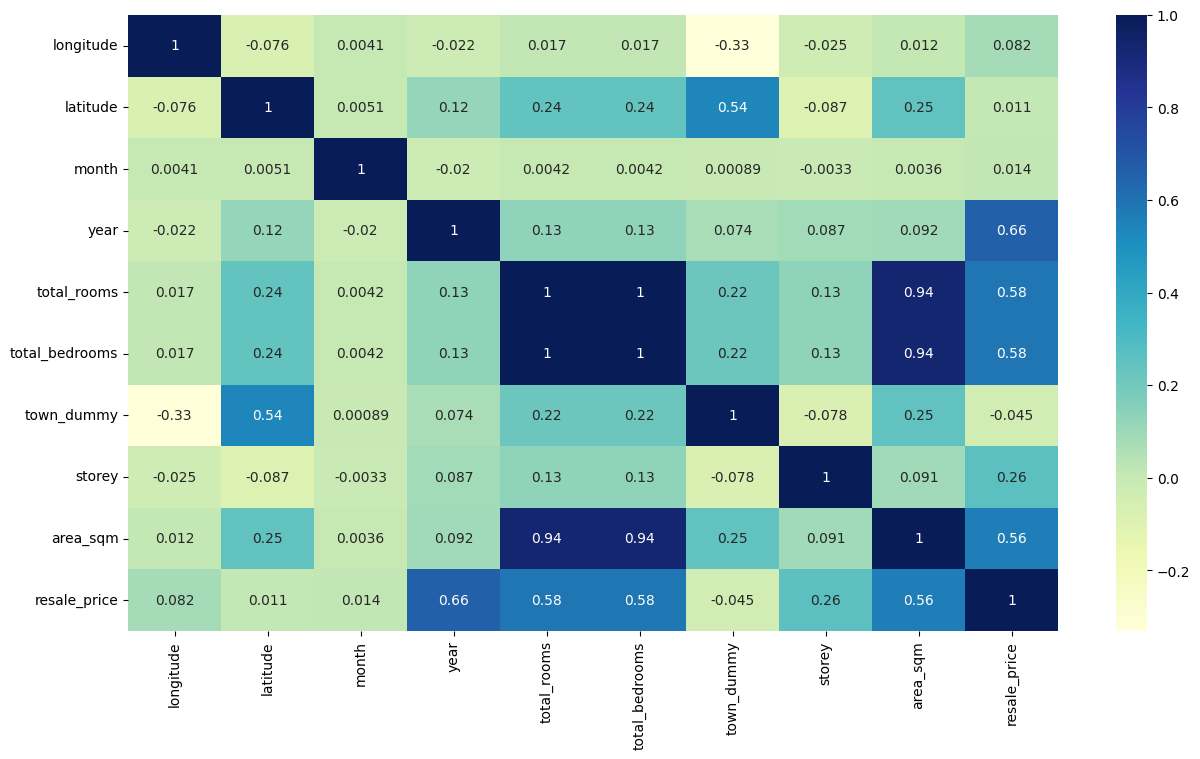

In [34]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.loc[:,train_data.columns != "flat_model"].corr(), annot=True, cmap="YlGnBu")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>],
       [<Axes: title={'center': 'town_dummy'}>,
        <Axes: title={'center': 'storey'}>,
        <Axes: title={'center': 'area_sqm'}>],
       [<Axes: title={'center': 'resale_price'}>, <Axes: >, <Axes: >]],
      dtype=object)

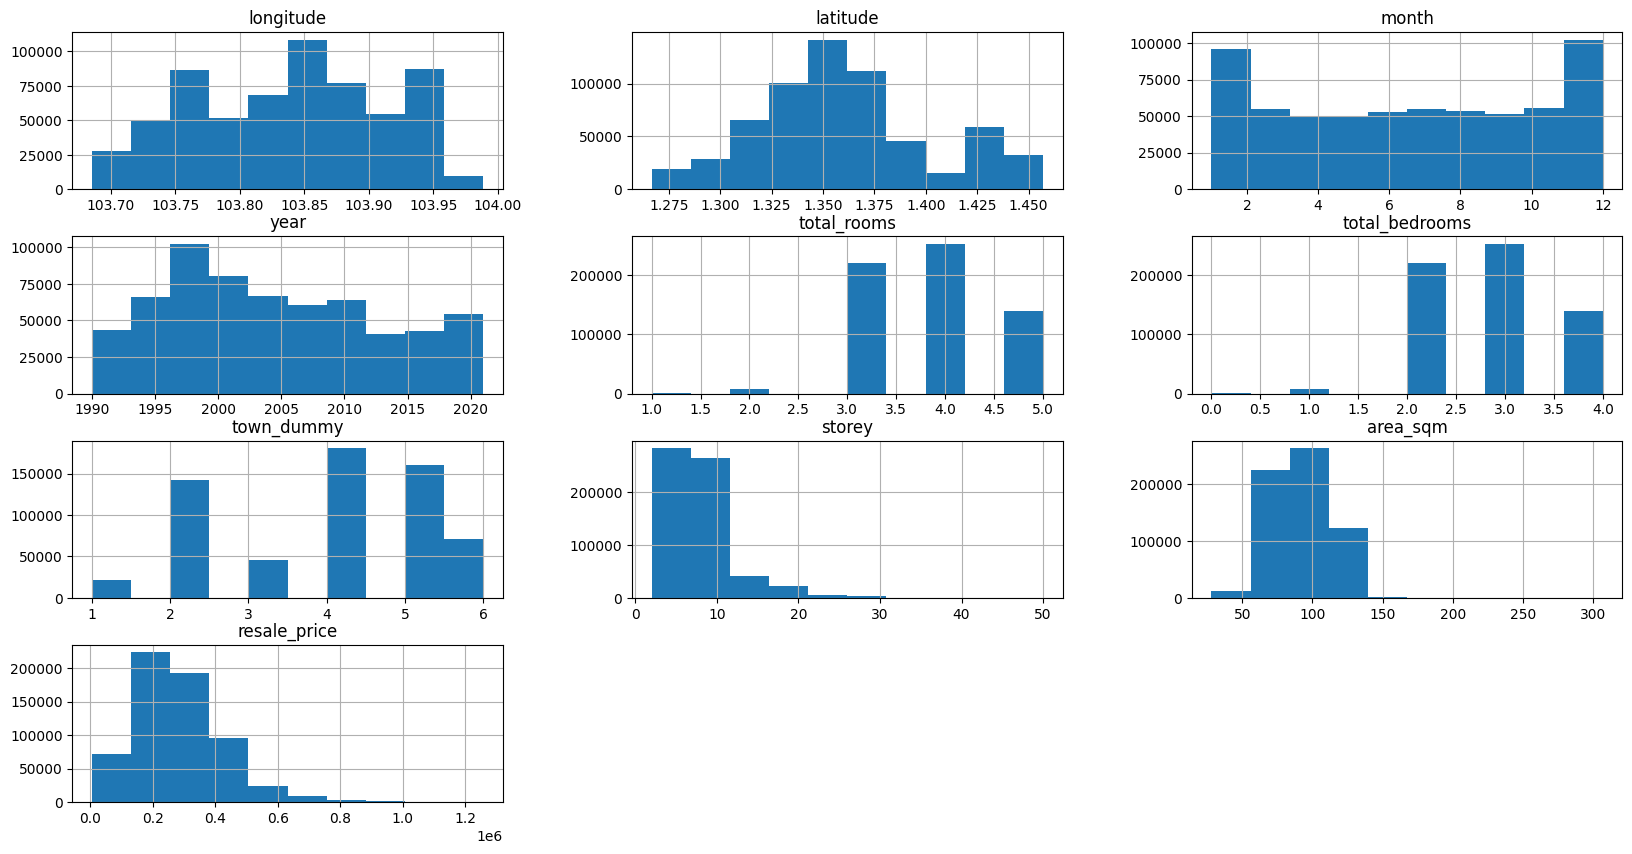

In [35]:
train_data.hist(figsize=(20,10))

In [36]:
train_data = train_data.join(pd.get_dummies(train_data["flat_model"])).drop(["flat_model"], axis=1)

<Axes: >

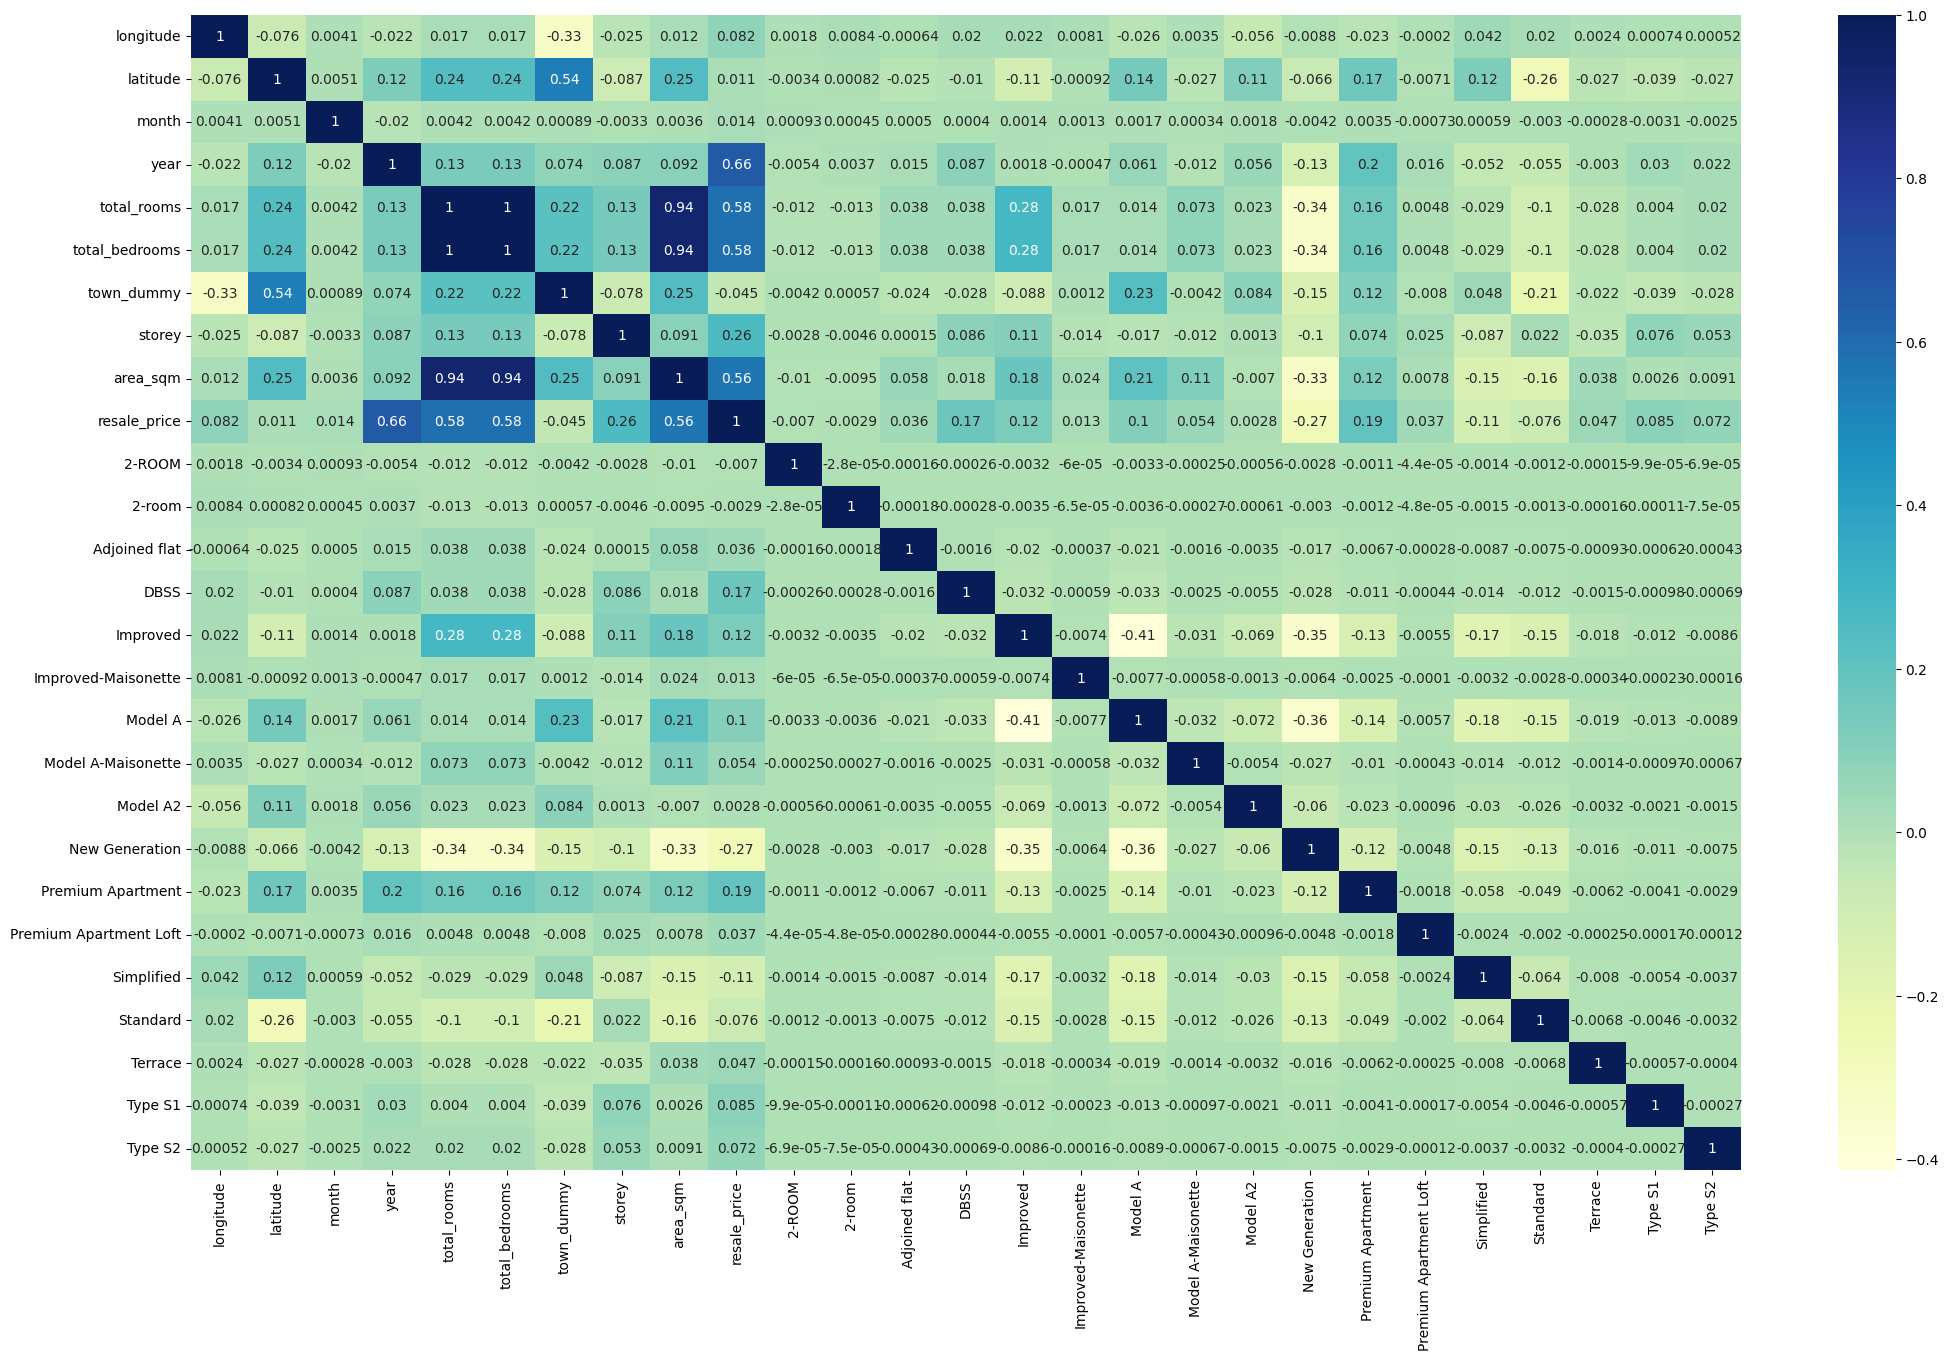

In [37]:
plt.figure(figsize=(25,15))
sns.heatmap(train_data.loc[:,train_data.columns != "flat_model"].corr(), annot=True, cmap="YlGnBu")

## Liner Regression model

In [38]:
# LINEAR MODEL
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train, y_train = train_data.drop(["resale_price"], axis=1), train_data["resale_price"]
X_train_s = scaler.fit_transform(X=X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)


LinearRegression()

In [39]:
test_data = X_test.join(y_test)
test_data = test_data.join(pd.get_dummies(test_data["flat_model"])).drop(["flat_model"], axis=1)
X_test, y_test = test_data.drop(["resale_price"], axis=1), test_data["resale_price"]
X_test, y_test = test_data.drop(["resale_price"], axis=1), test_data["resale_price"]

In [40]:
X_test_s = scaler.transform(X_test)

In [41]:
reg.score(X_test_s, y_test)

0.7851396473571178

## Random Forest Model

In [42]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train) #CAN SCALE HERE, but it would take too long for me :(

RandomForestRegressor()

In [43]:
forest.score(X_test, y_test)

0.9826892328483116

### Grid search with Cross Validation

In [44]:
from sklearn.model_selection import GridSearchCV

new_forest = RandomForestRegressor()
param_grid = {
    "n_estimators":[100, 200, 300],
    "min_samples_split" : [2,4],
    "max_depth": [None, 4, 8]
}  ### EXPERIMENT WITH THE VALUES

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

### Using best forest for model

In [46]:
best_forest = grid_search.best_estimator_

In [47]:
best_forest.score(X_test_s, y_test) #It was worse but we can evenutaully find better values that makes the model better

0.9817210732415579